In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Location = r'dataframe.csv'
d = pd.read_csv(Location)
df = pd.DataFrame(d)
df.drop(df.columns[[10, 11,20]], axis=1,inplace=True)

df1 = df[['log (L/Lsun)' , 'Mass (Msun)', 'Sec log (L/Lsun)','Sec Mass (Msun )']].dropna()
df1_lumin = df1['log (L/Lsun)']
df1_mass = df1['Mass (Msun)']


lum = np.array(df1_lumin)
mass = np.array(df1_mass)
sec_lum = np.array(df1['Sec log (L/Lsun)'])
sec_mass = np.array(df1['Sec Mass (Msun )'])

luminosity = []
luminosity_sigma = []
massa = []
massa_sigma = []

sec_luminosity = []
sec_massa = []
sec_luminosity_sigma = []
sec_massa_sigma = []


for i in range(len(lum)):
    luminosity.append(float(lum[i][0:5]))
    luminosity_sigma.append(float(lum[i][-5:-1]))
    massa.append(float(mass[i][0:5]))
    massa_sigma.append(float(mass[i][-4:-1]))

for i in range(len(sec_lum)):
    sec_luminosity.append(float(sec_lum[i][0:5]))
    sec_luminosity_sigma.append(float(lum[i][-5:-1]))
    sec_massa.append(float(sec_mass[i][0:5]))
    sec_massa_sigma.append(float(mass[i][-4:-1]))

for i in range(len(massa_sigma)):
    if(massa_sigma[i] >= 10):
        massa_sigma[i] = massa_sigma[i]/1000
    elif(massa_sigma[i] >= 1):
        massa_sigma[i] = massa_sigma[i]/100
    else:
        massa_sigma[i] = float(massa_sigma[i]/10)
        
for i in range(len(sec_massa_sigma)):
    if(sec_massa_sigma[i] >= 10):
        sec_massa_sigma[i] = float(sec_massa_sigma[i]/1000)
    elif(sec_massa_sigma[i] >= 1):
        sec_massa_sigma[i] = sec_massa_sigma[i]/100
    else:
        sec_massa_sigma[i] = sec_massa_sigma[i]/10
    


In [2]:
from scipy.optimize import curve_fit

popt, _ = curve_fit(lambda t, a, b, c: a * np.log(b * t) + c, massa, luminosity, maxfev=5000)

a,b,c = popt

secpopt,_ = curve_fit(lambda t, a, b, c: a * np.log(b * t) + c, sec_massa, sec_luminosity, maxfev=5000)
 
a1,b1,c1 = secpopt

x_line = np.arange(0, 26, 0.01)
y_line = a * np.log(b * x_line) + c       
sec_y_line = a1 * np.log(b1 * x_line) + c1
print(a,b,c)
print(a1,b1,c1)

1.6913334706446395 1.7816552627899662 -0.7219738876123386
1.741219715013226 1.1894517929890012 -0.08855851052575969


/tmp/ipykernel_25/3982832547.py:7: RuntimeWarning: invalid value encountered in log
  secpopt,_ = curve_fit(lambda t, a, b, c: a * np.log(b * t) + c, sec_massa, sec_luminosity, maxfev=5000)
/tmp/ipykernel_25/3982832547.py:12: RuntimeWarning: divide by zero encountered in log
  y_line = a * np.log(b * x_line) + c
/tmp/ipykernel_25/3982832547.py:13: RuntimeWarning: divide by zero encountered in log
  sec_y_line = a1 * np.log(b1 * x_line) + c1


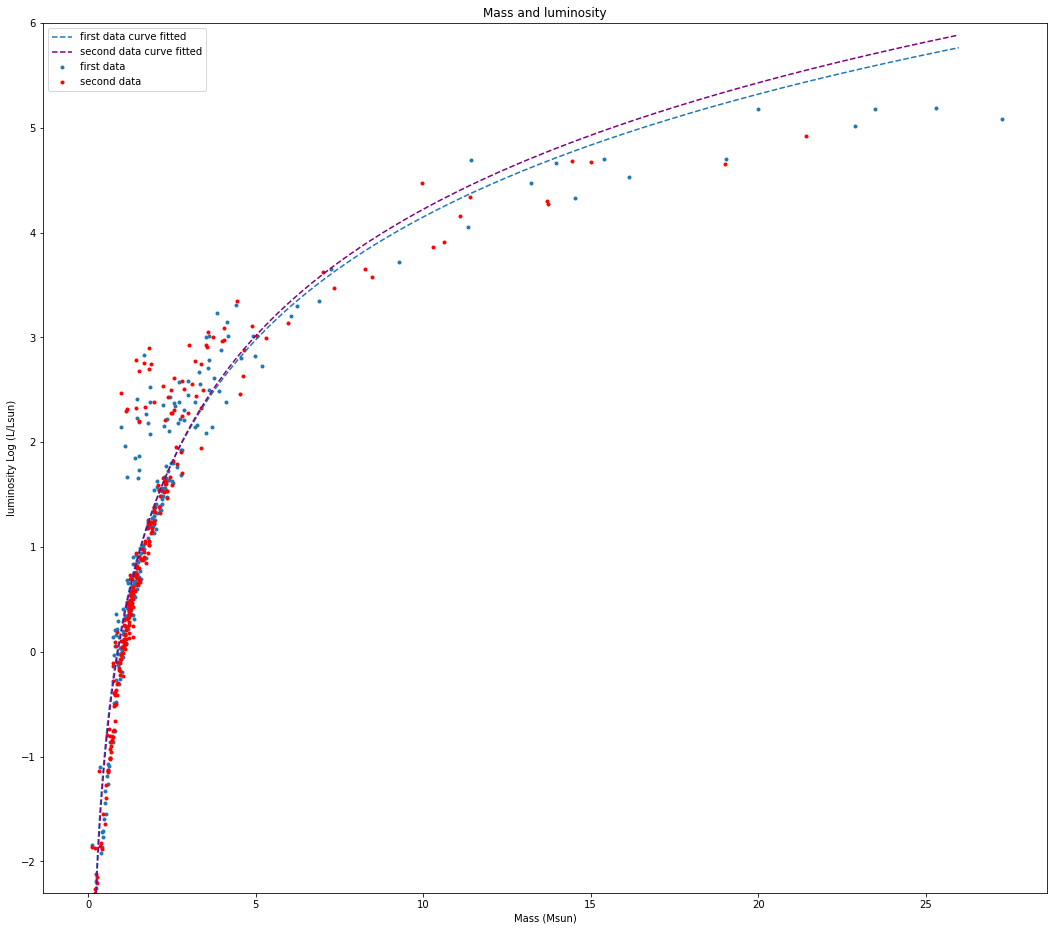

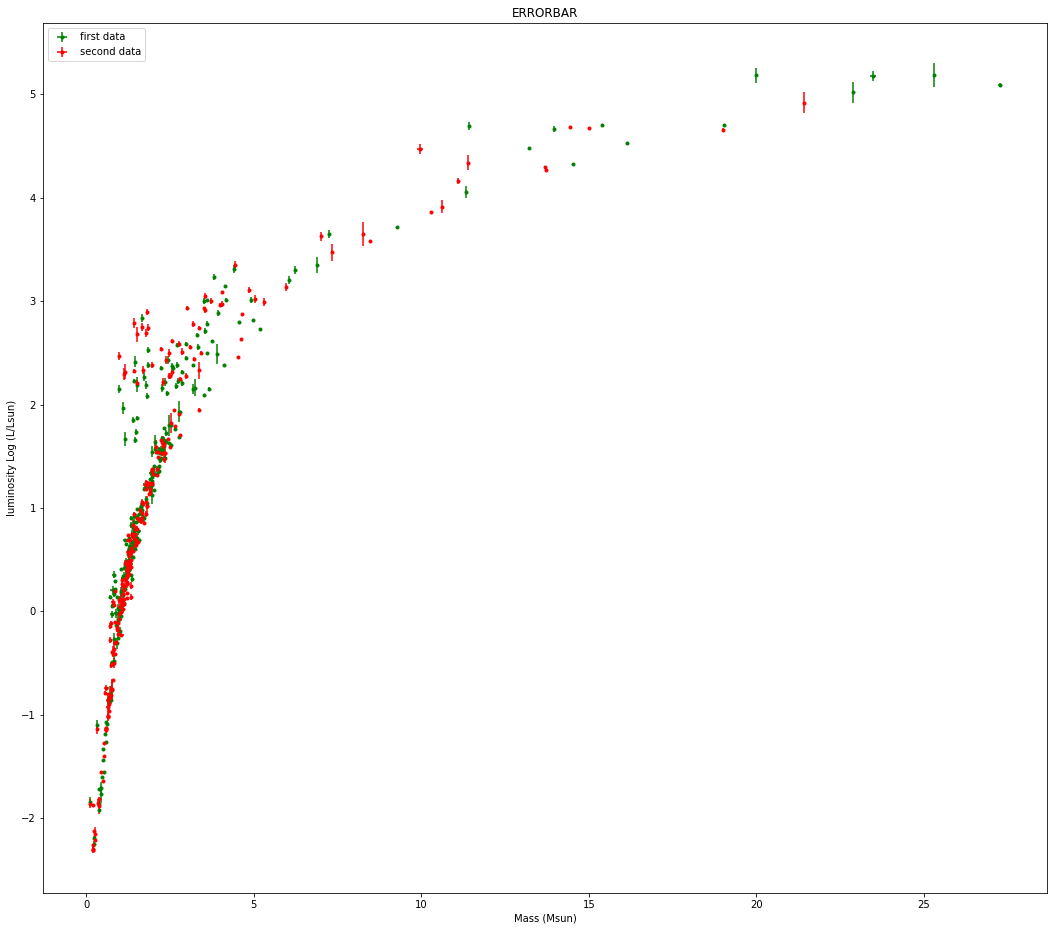

In [51]:
plt.figure(figsize=(18,16))
plt.scatter(massa, luminosity, marker='.',label = 'first data')
plt.plot(x_line,y_line,'--', label = 'first data curve fitted')
plt.scatter(sec_massa, sec_luminosity, marker='.', color = 'r',label = 'second data')
plt.plot(x_line, sec_y_line,'--',color = 'purple', label = 'second data curve fitted')

plt.ylim(-2.3, 6)
plt.title('Mass and luminosity')
plt.xlabel('Mass (Msun)')
plt.ylabel('luminosity Log (L/Lsun)')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(18,16))
plt.errorbar(massa, luminosity, yerr=luminosity_sigma, xerr=massa_sigma, fmt='.',color='g',label = 'first data')
plt.errorbar(sec_massa, sec_luminosity,xerr=sec_massa_sigma, yerr=sec_luminosity_sigma, fmt='.',color='r',label = 'second data')
plt.title('ERRORBAR')
plt.xlabel('Mass (Msun)')
plt.ylabel('luminosity Log (L/Lsun)')
plt.legend(loc='upper left')
plt.show()